# Support Vector Machine
Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well it’s best suited for classification. The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three. 

# Question
Predict if cancer is Benign or malignant. Using historical data about patients diagnosed with cancer enables doctors to differentiate malignant cases and benign ones are given independent attributes.

# Steps
1) Load the breast cancer dataset from sklearn.datasets
2) Separate input features and target variables.
3) Buil and train the SVM classifiers using RBF kernel.
4) Plot the scatter plot of the input features.
5) Plot the decision boundary.
6) Plot the decision boundary

Breast Cancer Dataset Overview:
-------------------------------
Dataset Description:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed 

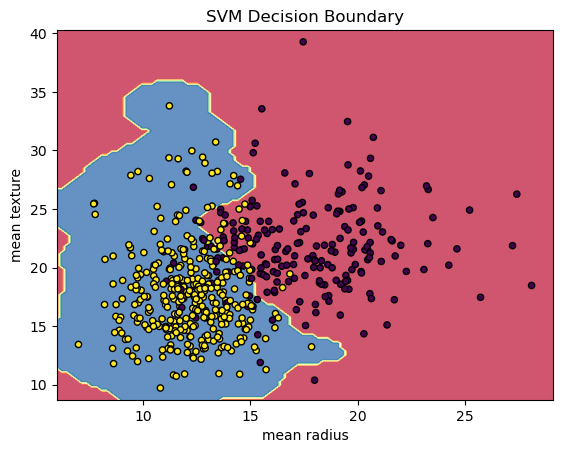

In [2]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the Breast Cancer dataset
cancer = load_breast_cancer()

# Explore the dataset
print("Breast Cancer Dataset Overview:")
print("-------------------------------")
print("Dataset Description:")
print(cancer.DESCR)
print("\nFeature Names:")
print(cancer.feature_names)
print("\nTarget Names:")
print(cancer.target_names)
print("\nData Shape:")
print(cancer.data.shape)
print("\nTarget Shape:")
print(cancer.target.shape)

# Extract the first two features for visualization
X = cancer.data[:, :2]
y = cancer.target

# Build the SVM model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

# Train the SVM model
svm.fit(X, y)

# Plot the Decision Boundary
DecisionBoundaryDisplay.from_estimator(
    svm,
    X,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1],
)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k")
plt.title("SVM Decision Boundary")
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.show()

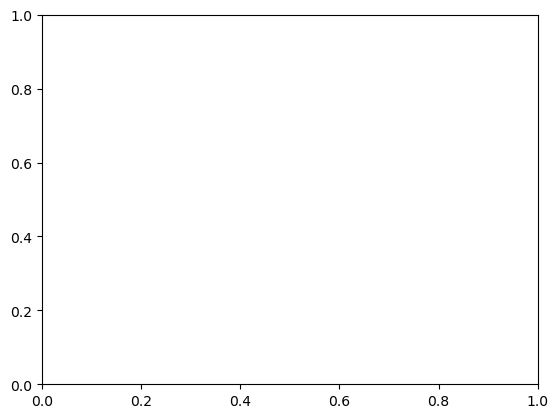

In [8]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from matplotlib.animation import FuncAnimation

# Load the Breast Cancer dataset
cancer = load_breast_cancer()

# Extract the first two features for visualization
X = cancer.data[:, :2]
y = cancer.target

# Initialize the SVM model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

# Create a meshgrid for visualization
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Create a figure and axis for the animation
fig, ax = plt.subplots()

# Function to update the plot with each iteration
def update(i):
    ax.clear()

    # Train the SVM model with a subset of the data
    subset_size = int(X.shape[0] * (i + 1) / 10)
    svm.fit(X[:subset_size], y[:subset_size])

    # Plot Decision Boundary
    DecisionBoundaryDisplay.from_estimator(
        svm,
        np.c_[xx.ravel(), yy.ravel()],
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        ax=ax
    )

    # Scatter plot
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k")
    ax.set_title(f"SVM Iteration {i + 1}")
    ax.set_xlabel(cancer.feature_names[0])
    ax.set_ylabel(cancer.feature_names[1])

# Create an animation
ani = FuncAnimation(fig, update, frames=20, interval=1000)

# Display the animation
plt.show()

In [9]:
from IPython import display

video = ani.to_html5_video()
html_code = display.HTML(video)
display.display(html_code)

#############################################################################################################
#############################################################################################################
# Classification using SVM
Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

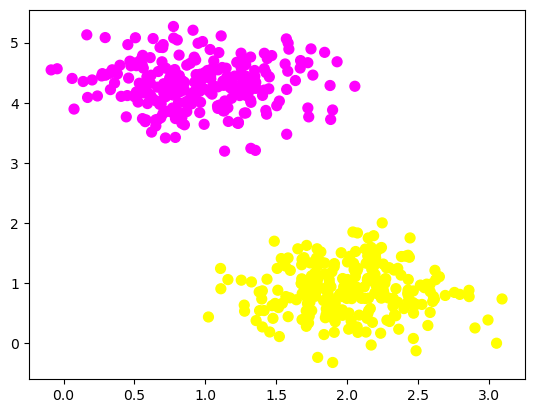

In [10]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs
 
# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=0.40)
import matplotlib.pyplot as plt
# plotting scatters 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
plt.show() 

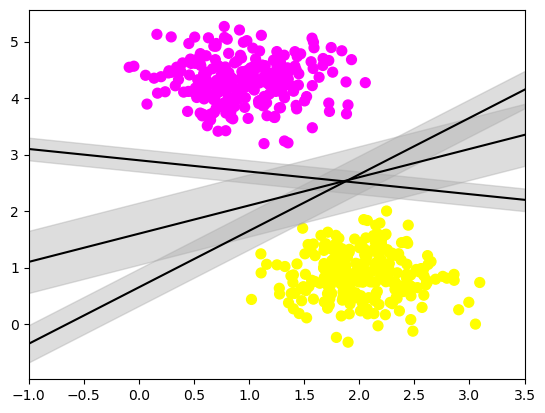

In [11]:
# creating linspace between -1 to 3.5 
xfit = np.linspace(-1, 3.5)
 
# plotting scatter
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')
 
# plot a line between the different sets of data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', 
    color='#AAAAAA', alpha=0.4)
 
plt.xlim(-1, 3.5);
plt.show()

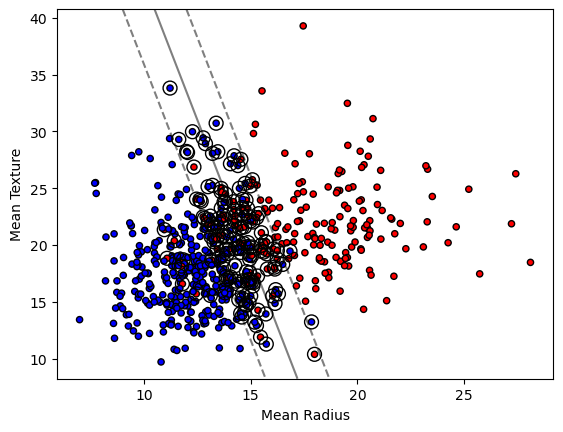

In [20]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Reading the CSV file
data = pd.read_csv("cancer.csv")  # Replace with the actual file path

# Map class labels to colors (e.g., 'M' to red, 'B' to blue)
colors = {'M': 'red', 'B': 'blue'}
data['Color'] = data['Class'].map(colors)

# Extracting two features ('mean_radius' and 'mean_texture' in this example)
x = data[['A', 'B']].values  # Replace with actual feature names

# Extracting the color for each data point
colors = data['Color'].values

# Creating an SVM classifier with a linear kernel
clf = SVC(kernel='linear')

# Fitting the SVM model to the data
clf.fit(x, y)

# Making predictions on new data points
prediction_1 = clf.predict([[14.68, 20.13]])
prediction_2 = clf.predict([[16.13, 20.68]])

# Getting the coefficients and intercept of the hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]

# Plotting the data points with colors
plt.scatter(x[:, 0], x[:, 1], c=colors, s=20, edgecolors='k')

# Plotting the decision boundary (hyperplane)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Creating a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Highlight the support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

# Label the axes
ax.set_xlabel('Mean Radius')
ax.set_ylabel('Mean Texture')

# Show the plot
plt.show()

#############################################################################################################
#############################################################################################################
# Regression using SVM
Support vector regression (SVR) is a type of support vector machine (SVM) that is used for regression tasks. It tries to find a function that best predicts the continuous output value for a given input value.

SVR can use both linear and non-linear kernels. A linear kernel is a simple dot product between two input vectors, while a non-linear kernel is a more complex function that can capture more intricate patterns in the data. The choice of kernel depends on the data’s characteristics and the task’s complexity.

In scikit-learn package for Python, you can use the ‘SVR’ class to perform SVR with a linear or non-linear ‘kernel’. To specify the kernel, you can set the kernel parameter to ‘linear’ or ‘RBF’ (radial basis function).

# Fitting an SVR Model on the Sine Curve data using Linear Kernel

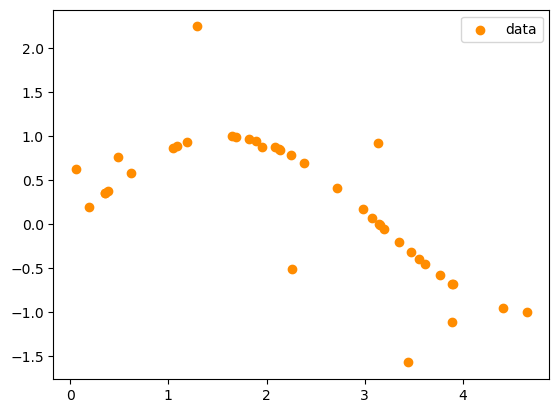

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVR 
from matplotlib.animation import FuncAnimation

# generate synthetic data 
X = np.sort(5 * np.random.rand(40, 1), axis=0) 
y = np.sin(X).ravel() 

# add some noise to the data 
y[::5] += 3 * (0.5 - np.random.rand(8)) 

# create an SVR model with a linear kernel 
svr = SVR(kernel='linear') 

# Create a figure and axis for the animation
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
scatter = ax.scatter(X, y, color='darkorange', label='data')
ax.legend()

# Initialization function for the animation
def init():
    line.set_data([], [])
    return line,

# Update function for the animation
def update(frame):
    X_train = X[:frame + 1]
    y_train = y[:frame + 1]
    
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X)
    
    line.set_data(X, y_pred)
    scatter.set_offsets(np.column_stack((X_train, y_train)))
    
    return line, scatter

# Create the animation
ani = FuncAnimation(fig, update, frames=len(X), init_func=init, blit=True)

plt.show()

In [24]:
from IPython import display

video = ani.to_html5_video()
html_code = display.HTML(video)
display.display(html_code)

# Fitting an SVR Model on the Sine Curve data using Polynomial Kernel

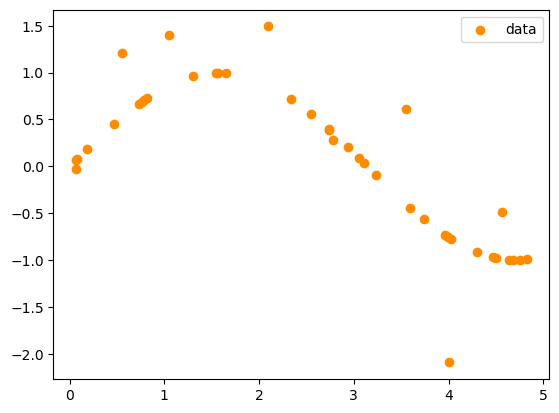

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from matplotlib.animation import FuncAnimation

# Generate synthetic data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add some noise to the data
y[::5] += 3 * (0.5 - np.random.rand(8))

# Create an SVR model with a polynomial kernel
svr = SVR(kernel='poly', degree=3)

# Create a figure and axis for the animation
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
scatter = ax.scatter(X, y, color='darkorange', label='data')
ax.legend()

# Initialization function for the animation
def init():
    line.set_data([], [])
    return line,

# Update function for the animation
def update(frame):
    X_train = X[:frame + 1]
    y_train = y[:frame + 1]

    svr.fit(X_train, y_train)
    y_pred = svr.predict(X)

    line.set_data(X, y_pred)
    scatter.set_offsets(np.column_stack((X_train, y_train)))

    return line, scatter

# Create the animation
ani = FuncAnimation(fig, update, frames=len(X), init_func=init, blit=True)

plt.show()

In [26]:
from IPython import display

video = ani.to_html5_video()
html_code = display.HTML(video)
display.display(html_code)

# Fitting an SVR Model on the Sine Curve data using RBF Kernel

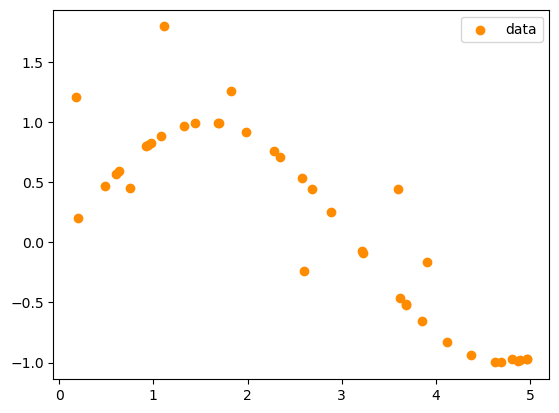

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from matplotlib.animation import FuncAnimation

# Generate synthetic data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add some noise to the data
y[::5] += 3 * (0.5 - np.random.rand(8))

# Create an SVR model with an RBF kernel
svr = SVR(kernel='rbf')

# Create a figure and axis for the animation
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
scatter = ax.scatter(X, y, color='darkorange', label='data')
ax.legend()

# Initialization function for the animation
def init():
    line.set_data([], [])
    return line,

# Update function for the animation
def update(frame):
    X_train = X[:frame + 1]
    y_train = y[:frame + 1]

    svr.fit(X_train, y_train)
    y_pred = svr.predict(X)

    line.set_data(X, y_pred)
    scatter.set_offsets(np.column_stack((X_train, y_train)))

    return line, scatter

# Create the animation
ani = FuncAnimation(fig, update, frames=len(X), init_func=init, blit=True)

plt.show()

In [28]:
from IPython import display

video = ani.to_html5_video()
html_code = display.HTML(video)
display.display(html_code)